## Logistic Regression with Regularization

In [285]:
import numpy as np
import matplotlib.pyplot as plt

In [286]:
x = np.loadtxt('./ex5Data/ex5Logx.dat', delimiter=',', dtype= np.float32)
y = np.loadtxt('./ex5Data/ex5Logy.dat', dtype=np.float32)

In [287]:
x.shape

(117, 2)

In [288]:
y.shape

(117,)

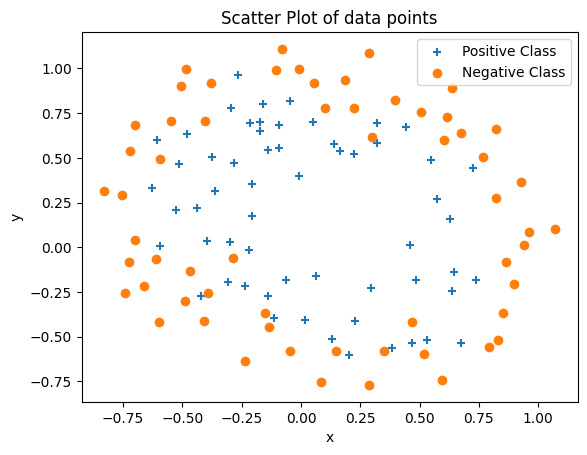

In [289]:
pos = np.where(y == 1)
neg = np.where(y == 0)

plt.scatter(x[pos,0], x[pos,1], marker = '+', label = 'Positive Class')
plt.scatter(x[neg,0], x[neg,1], marker = 'o', label = 'Negative Class')
plt.title("Scatter Plot of data points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [290]:
def map_feature(u, v):
    degree = 6  # degree of polynomial features
    out = np.ones((u.shape[0], 1))
    for i in range(1, degree + 1):  # Iterate over each degree up to 6
        for j in range(i + 1):  # Iterate over each possible power combination
            # Compute the higher-order feature and concatenate it to the output array
            out = np.hstack((out, (u ** (i - j) * v ** j).reshape(-1, 1)))
    return out

In [291]:
def hypothesis(x,w):
    return 1/(1 + np.exp(-np.dot(x,w)))

In [292]:
def cost_function_reg(x, y, w, lam):
    m = x.shape[0]
    h = hypothesis(x, w)
    epsilon = 1e-10  # Small epsilon value
    reg_term = (lam / (2 * m)) * np.sum(w[1:] ** 2)
    return (-1 / m) * (np.dot(y.T, np.log(h + epsilon))
                       + np.dot((1 - y).T, np.log(1 - h + epsilon)))+ reg_term

In [293]:
def gradient_reg(x, y, w, lam):
    m = len(y)
    h = hypothesis(x, w)
    reg_term = (lam / m) * w
    reg_term[0] = 0  # No regularization for bias term
    return (1 / m) * np.dot(x.T, h - y) + reg_term

In [294]:
def newtons_method(X, y, theta, lam, max_iters=15):
    m = len(y)
    costVal = []
    epochs = []

    for i in range(max_iters):
        costVal.append(cost_function_reg(X, y, theta, lam))
        grad = gradient_reg(X, y, theta, lam)
        h_theta = hypothesis(X, theta)
        diagonal = h_theta * (1 - h_theta)
        Hessian = (1 / m) * np.dot(X.T, np.dot(np.diag(diagonal), X)) + (lam / m) * np.eye(len(theta))
        theta -= np.linalg.inv(Hessian).dot(grad)
        epochs.append(i)

    return theta, costVal, epochs

In [ ]:
X = map_feature(x[:, 0], x[:, 1])
theta_init = np.zeros(X.shape[1])
lambda_vals = [0, 9, 10]

In [296]:
# Run Newton's method for different lambdas
for i, lambda_val in enumerate(lambda_vals):
    theta_opt, J_history, _= newtons_method(X, y, theta_init, lambda_val)
    print(f"For Lambda = {lambda_val}:")
    print(f"Optimal theta: {theta_opt}")
    print(f"Final Cost: {J_history[-1]}")
    print()

    # Plotting decision boundary
    u = np.linspace(-1, 1.5, 200)
    v = np.linspace(-1, 1.5, 200)
    z = np.zeros((len(u), len(v)))

    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(map_feature(np.array([ui]), np.array([vj])), theta_opt)

    plt.contour(u, v, z.T, levels=[0], colors='k', linewidths=2)

    plt.scatter(x[pos, 0], x[pos, 1], marker='+', label='Positive Class')
    plt.scatter(x[neg, 0], x[neg, 1], marker='o', label='Negative Class')
    plt.xlabel('u')
    plt.ylabel('v')
    plt.legend()
    plt.title(f'Decision Boundary for Lambda = {lambda_val}')
    plt.show()

ZeroDivisionError: division by zero